## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

## Link do Notebook

- https://github.com/alura-cursos/formacao-machine-learning

In [1]:
import warnings
# warnings.simplefilter("once")

# Comentei pois estava usando o Anaconda, somente o yellowbrick eu não tinha. Usei o prompt do conda.
'''
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet
!pip install yellowbrick=="0.9.0" --quiet
!pip install numpy=="1.16.0" --quiet
'''

'\n!pip install pandas=="0.24.0" --quiet\n!pip install seaborn=="0.9.0" --quiet\n!pip install scipy=="1.2.0" --quiet\n!pip install yellowbrick=="0.9.0" --quiet\n!pip install numpy=="1.16.0" --quiet\n'

Eu comentei o warning acima pois estava dando o seguinte erro que pesquisei para como resolve-lo mas não entendi como:

DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above

In [2]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 1.1.3
Usando seaborn 0.11.0
Usando scipy 1.5.0
Usando yellowbrick 1.1
Usando numpy 1.19.1


C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [4]:
# solução
enem = pd.read_csv('./input/MICRODADOS_ENEM_2017.csv', 
                   sep=';', 
                   encoding='iso-8859-1', 
                   usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", 
                            "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]
                  )

In [5]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [6]:
enem.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731341 entries, 0 to 6731340
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   NU_NOTA_CN     4437560 non-null  float64
 1   NU_NOTA_CH     4701428 non-null  float64
 2   NU_NOTA_LC     4701428 non-null  float64
 3   NU_NOTA_MT     4437560 non-null  float64
 4   NU_NOTA_COMP1  4701428 non-null  float64
 5   NU_NOTA_COMP2  4701428 non-null  float64
 6   NU_NOTA_COMP3  4701428 non-null  float64
 7   NU_NOTA_COMP4  4701428 non-null  float64
 8   NU_NOTA_COMP5  4701428 non-null  float64
dtypes: float64(9)
memory usage: 462.2 MB


In [7]:
print(f"{enem.shape[0]} elementos e {enem.shape[1]} colunas")
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [8]:
# solução
enem.columns

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5'],
      dtype='object')

In [9]:
todas_as_notas = list(enem.columns)

In [10]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [11]:
enem = enem.dropna()
enem.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4426755 entries, 0 to 6731340
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   NU_NOTA_CN     4426755 non-null  float64
 1   NU_NOTA_CH     4426755 non-null  float64
 2   NU_NOTA_LC     4426755 non-null  float64
 3   NU_NOTA_MT     4426755 non-null  float64
 4   NU_NOTA_COMP1  4426755 non-null  float64
 5   NU_NOTA_COMP2  4426755 non-null  float64
 6   NU_NOTA_COMP3  4426755 non-null  float64
 7   NU_NOTA_COMP4  4426755 non-null  float64
 8   NU_NOTA_COMP5  4426755 non-null  float64
dtypes: float64(9)
memory usage: 337.7 MB


In [12]:
enem.NU_NOTA_MT[:5]

0   465.500
3   591.200
4   584.600
5   578.500
6   607.500
Name: NU_NOTA_MT, dtype: float64

In [13]:
enem = enem.reset_index().drop('index', axis=1)

## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [14]:
# solução e impressão
enem['nota_total'] = enem.sum(axis=1)
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000,2681.400
1,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000,2949.500
2,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000,2786.700
3,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000,2795.000
4,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000,2858.500


<AxesSubplot:ylabel='Frequency'>

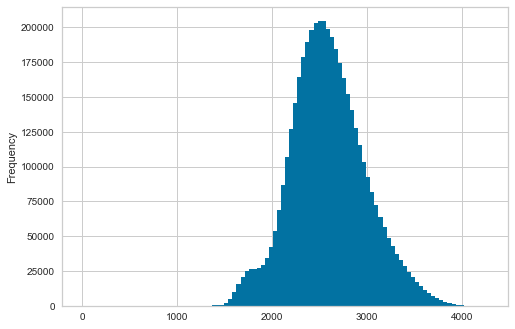

In [15]:
# solução histograma e descrição
enem.nota_total.plot.hist(bins=100)

In [16]:
enem.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
count,4426755.000,4426755.000,4426755.000,4426755.000,4426755.000,4426755.000,4426755.000,4426755.000,4426755.000,4426755.000
mean,510.923,521.453,512.151,518.833,117.910,113.208,107.515,109.378,81.377,2592.747
std,72.080,82.065,65.545,104.977,37.929,38.939,39.993,39.288,47.288,395.990
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,454.800,459.200,470.800,435.700,100.000,100.000,80.000,100.000,40.000,2330.700
50%,506.400,524.000,516.500,502.800,120.000,120.000,120.000,120.000,80.000,2569.300
75%,561.800,582.700,558.200,585.400,140.000,120.000,120.000,120.000,120.000,2839.500
max,885.600,868.300,788.800,993.900,200.000,200.000,200.000,200.000,200.000,4276.200


In [17]:
enem.nota_total.mean()

2592.7466701454587

In [18]:
enem.nota_total.median()

2569.3

In [19]:
enem.nota_total.std()

395.98987496996494

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição
count   44267.000
mean     2594.171
std       396.475
min         0.000
25%      2330.450
50%      2572.800
75%      2841.550
max      4198.900
Name: nota_total, dtype: float64


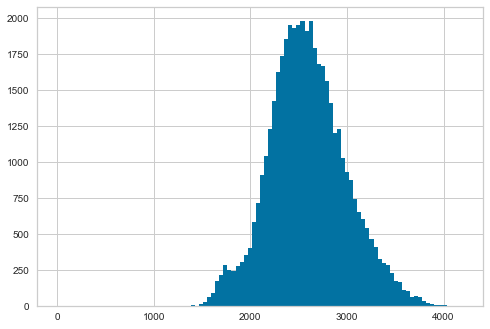

In [20]:
import matplotlib.pyplot as plt

# solução sua função de sampling
def eda_sample(enem):
    np.random.seed(745)
    enem_eda = enem.sample(int(enem.shape[0]*0.01))
    print("Enem EDA sampling tem a distribuição")
    # descreva a nota_total
    print(enem_eda.nota_total.describe())
    # plote o histograma da nota_total e mostre com plt.show()
    plt.hist(enem_eda.nota_total, bins=100)
    plt.show()
    return enem_eda

enem_eda = eda_sample(enem)

In [21]:
enem_eda.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
2228087,565.000,493.000,514.900,418.700,120.000,120.000,100.000,80.000,60.000,2471.600
182422,560.300,509.300,466.100,652.200,120.000,120.000,120.000,140.000,120.000,2807.900
1749630,497.600,547.100,539.900,532.700,120.000,100.000,80.000,120.000,40.000,2577.300
2843051,600.600,632.300,647.300,578.500,160.000,120.000,140.000,160.000,160.000,3198.700
3804992,554.200,458.700,419.900,374.900,120.000,80.000,120.000,80.000,40.000,2247.700


In [22]:
display(enem.nota_total.describe(), enem_eda.nota_total.describe())

count   4426755.000
mean       2592.747
std         395.990
min           0.000
25%        2330.700
50%        2569.300
75%        2839.500
max        4276.200
Name: nota_total, dtype: float64

count   44267.000
mean     2594.171
std       396.475
min         0.000
25%      2330.450
50%      2572.800
75%      2841.550
max      4198.900
Name: nota_total, dtype: float64

## Solução

- Olhando de perto os dados da nota_toral com o dado bruto e a amostra, encontramos valores parecidos e bem próximos de média, mediana e desvio padrão. 

- Isso por que chegamos próximo ao valor mínimo de dados na amostra que são significantes, para se aproximar da média e desvio padrão do original. 

- Na teoria deveriamos estipular uma significancia e calcular o numero mínimo de dados da amostra, já que o histograma de ambos foram parecidos e próximos a uma distribuição normal.

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [23]:
# solução
todas_as_notas.append('nota_total')
correlacoes = enem_eda.corr()
correlacoes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.610,0.568,0.553,0.342,0.317,0.386,0.379,0.350,0.731
NU_NOTA_CH,0.610,1.000,0.707,0.571,0.396,0.357,0.436,0.425,0.391,0.792
NU_NOTA_LC,0.568,0.707,1.000,0.547,0.443,0.371,0.458,0.447,0.398,0.777
NU_NOTA_MT,0.553,0.571,0.547,1.000,0.361,0.330,0.397,0.389,0.352,0.763
NU_NOTA_COMP1,0.342,0.396,0.443,0.361,1.000,0.771,0.832,0.862,0.594,0.726
NU_NOTA_COMP2,0.317,0.357,0.371,0.330,0.771,1.000,0.859,0.795,0.634,0.694
NU_NOTA_COMP3,0.386,0.436,0.458,0.397,0.832,0.859,1.000,0.866,0.675,0.774
NU_NOTA_COMP4,0.379,0.425,0.447,0.389,0.862,0.795,0.866,1.000,0.653,0.760
NU_NOTA_COMP5,0.350,0.391,0.398,0.352,0.594,0.634,0.675,0.653,1.000,0.675
nota_total,0.731,0.792,0.777,0.763,0.726,0.694,0.774,0.760,0.675,1.000


In [24]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

## Solução

- Ao olharmos a linha de correlação da nota total com cada uma das notas do ENEM, temos que em todas temos uma correlação positiva, ou seja, quando as notas aumentam, a nota total aumente também, e o oposto é verdadeiro. Isso faz sentido, pois quanto maior sua nota de matemática, maior será sua nota final, pois é somado.

- Em relação ao valor de cada uma delas, temos que a correlação em todas, são altas. Todas elas possuem valor acima de 0.5, com algumas acima de 0.75, o que no geral, podemos dizer que as correlações são bem relevantes.

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [25]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = correlacoes.iloc[-1]

In [26]:
print(correlacao_com_nota_total)

NU_NOTA_CN      0.731
NU_NOTA_CH      0.792
NU_NOTA_LC      0.777
NU_NOTA_MT      0.763
NU_NOTA_COMP1   0.726
NU_NOTA_COMP2   0.694
NU_NOTA_COMP3   0.774
NU_NOTA_COMP4   0.760
NU_NOTA_COMP5   0.675
nota_total      1.000
Name: nota_total, dtype: float64


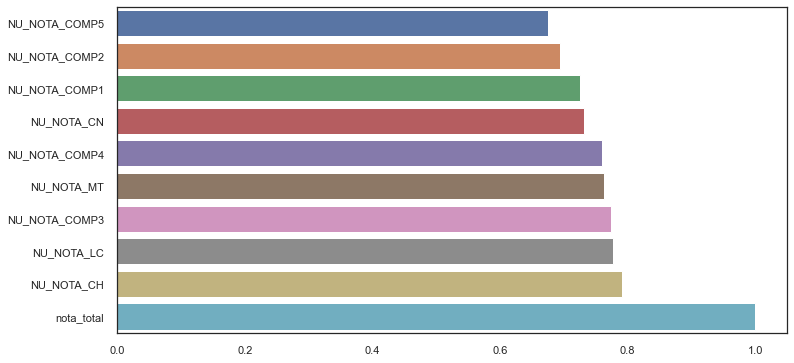

In [27]:
# solução gráfico
def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = dados.sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(correlacao_com_nota_total)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [28]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
interesse = enem_eda[['NU_NOTA_MT', 'NU_NOTA_LC', 'nota_total']]
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
2228087,418.700,514.900,2471.600
182422,652.200,466.100,2807.900
1749630,532.700,539.900,2577.300
2843051,578.500,647.300,3198.700
3804992,374.900,419.900,2247.700


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    # seed
    seed = 42367
    np.random.seed(seed)
    # train_test_split
    train_x, test_x, train_y, test_y = train_test_split(dados[['NU_NOTA_MT', 'NU_NOTA_LC']],
                                                        dados.nota_total, 
                                                        random_state=seed)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print(f"Usando colunas {str(train_x.columns.values)} como X")
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [31]:
# Código pronto
train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 2) (33200,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 399.4105289279899


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [33]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(train_x, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino
    model = LinearRegression()
    model.fit(train_x, train_y)
    # calcule o r2_score com os dados de teste
    r2_score = model.score(test_x, test_y)
    # calcule a predição e os dois tipos de erros
    test_pred = model.predict(test_x)
    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)
    print("*" * 80)
    print("r2 score", r2_score)
    print("mse", mse)
    print("mae", mae)
    
    return model

In [34]:
# código pronto
roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.7743796881590438
mse 35989.67869923794
mae 141.5279335739033


LinearRegression()

In [35]:
test_y.std()

399.4105289279899

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

- O erro médio absoluto foi de 141.52 e o desvio padrão foi de 399.41. O erro médio absoluto foi mais próximo de zero que o desvio padrão dos dados de teste.

- Com relação ao seu valor, podemos dizer que mesmo com um valor não muito bom de R² para o modelo, podemos dizer que o valor do erro absoluto foi bom em comparação com os valores das notas de cada conceito e notas totais.

- Sempre devemos realizar comparações para indicar se um erro esta melhor que o outro. Sempre devemos ter bases para analisar os erros dos modelos realizados.

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

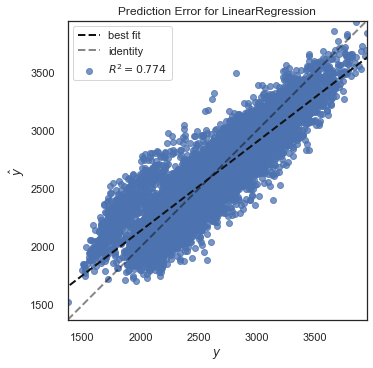

In [36]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

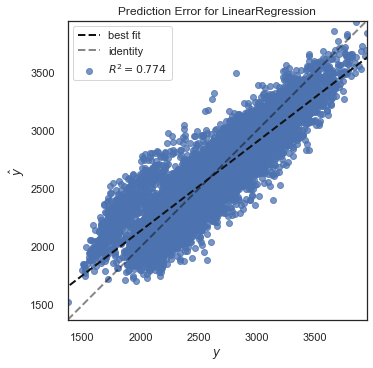

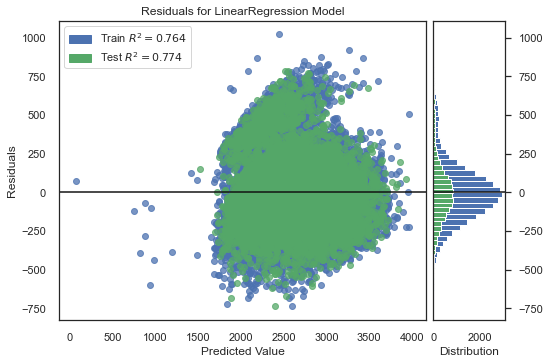

In [37]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

Adaptei as funções que já vieram com o projeto para facilitar a execução.

In [38]:
# código pronto
def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse, notas)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

In [39]:
def split(dados, notas):
    # seed
    seed = 42367
    np.random.seed(seed)
    # train_test_split
    X = dados[notas[:len(notas)-1]]
    Y = dados[notas[-1]]
    train_x, test_x, train_y, test_y = train_test_split(X,
                                                        Y, 
                                                        random_state=seed)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print(f"Usando colunas {str(train_x.columns.values)} como X")
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 9) (33200,) (11067, 9) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 399.4105289279899
********************************************************************************
r2 score 1.0
mse 1.5521782220395913e-25
mae 2.773395902058543e-13


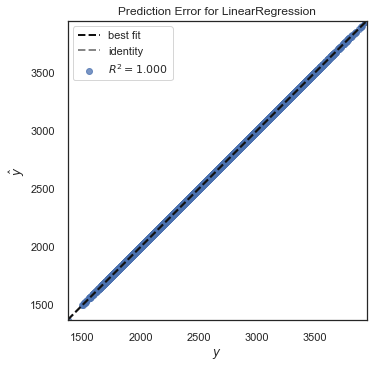

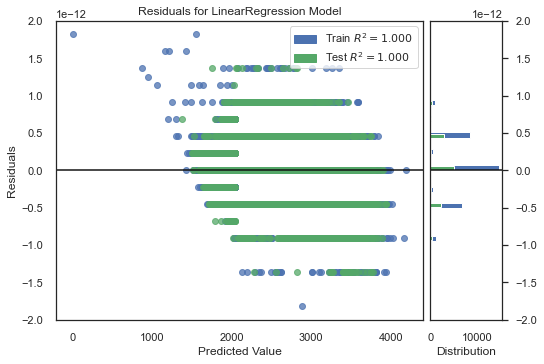

In [40]:
# solução 1: teste com todas as notas
notas = list(enem_eda.columns)
regressao_completa_para(notas)

> Podemos perceber que o modelo com todas as notas possíveis resulta no melhor situação possível, pois as somas das notas que resultaram no valor da nota_total. Isso proporcionou um R² perfeito, com um MSE e MAE muito pequenos. Isso seria um modelo perfeito, mas não podemos leva-lo em conta, pois não faz sentido usar todas as notas e relaciona-la com uma variavel dependente que foi resultado da soma das notas. O mais correto seria analisar separadamente ou um conjunto de notas para ver a importancia de cada na predição e regressão dos dados originais.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 8) (33200,) (11067, 8) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'] como X
Desvio padrão do conjunto de testes 399.4105289279899
********************************************************************************
r2 score 0.9929848873593602
mse 1119.0111737526597
mae 26.44935149290255


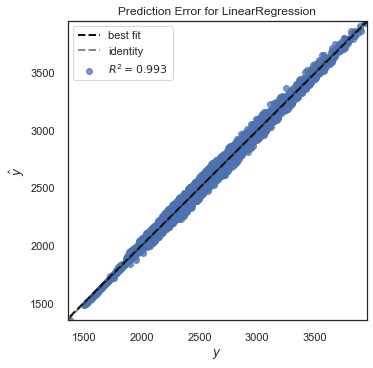

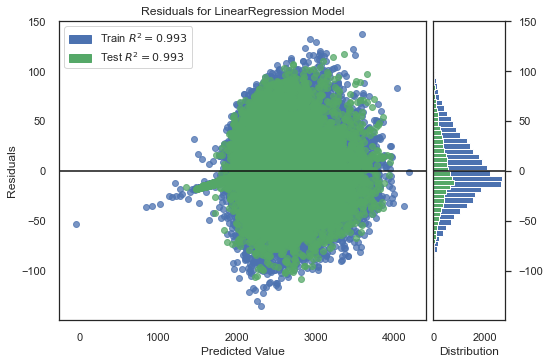

In [41]:
# solução 2: com 8 notas, retirando a de manor correlação -> NU_NOTA_COMP5
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
         'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'nota_total']
regressao_completa_para(notas)

> Ao eliminar uma nota, no caso a minha escolha foi a de menor correlação. Percebemos um aumento no resultado do MSE e MAE, assim como uma diminuição R². MAs ainda assim eliminar uma nota, não permite uma solução adequada para regressão, pois foi muito proximo da perfeição e pelo fato de a maioria das notas estarem presentes na analise.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 1) (33200,) (11067, 1) (11067,)
Usando colunas ['NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 399.4105289279899
********************************************************************************
r2 score 0.6329703424665343
mse 58546.499381811984
mae 184.37053681796183


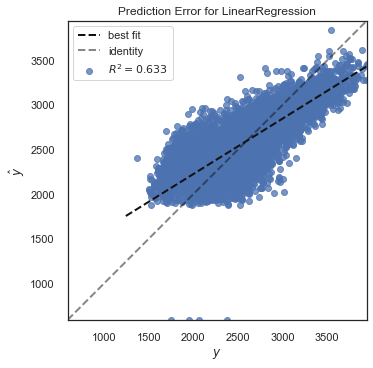

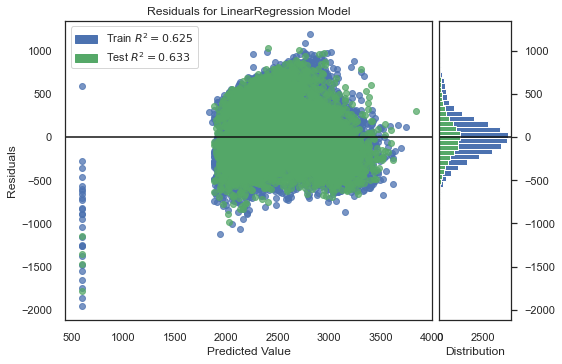

In [42]:
# solução 3: teste com 1 nota, com a maior correlação -> NU_NOTA_CH
notas = ['NU_NOTA_CH', 'nota_total']
regressao_completa_para(notas)

> Decidi usar somente uma unica nota, no caso a de Ciencias Humanas, que apresentava a maior correlação entre todas. Podemos observar que ouve uma diminuição grande do R² e aumento significativo do MSE e MAE. Mas pela correlação ser a maior, ouve resultados convincentes, mesmo usando uma unica variavel indepedente. Veremos uma situação interessante a seguir.

In [43]:
correlacao_com_nota_total

NU_NOTA_CN      0.731
NU_NOTA_CH      0.792
NU_NOTA_LC      0.777
NU_NOTA_MT      0.763
NU_NOTA_COMP1   0.726
NU_NOTA_COMP2   0.694
NU_NOTA_COMP3   0.774
NU_NOTA_COMP4   0.760
NU_NOTA_COMP5   0.675
nota_total      1.000
Name: nota_total, dtype: float64

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 1) (33200,) (11067, 1) (11067,)
Usando colunas ['NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 399.4105289279899
********************************************************************************
r2 score 0.4621219356881149
mse 85799.27292893128
mae 235.1049671404999


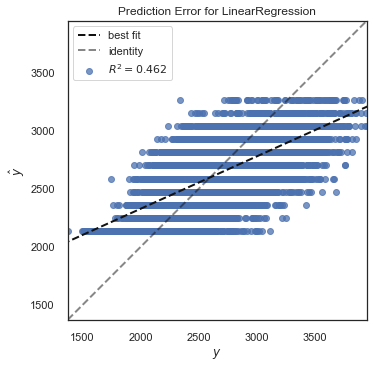

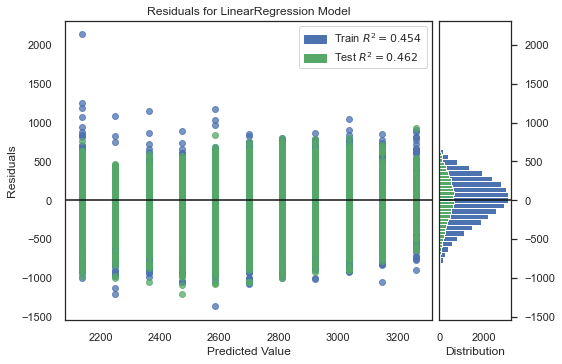

In [44]:
# solução 4: com 1 nota, mas com a menor correlação -> NU_NOTA_COMP5
notas = ['NU_NOTA_COMP5', 'nota_total']
regressao_completa_para(notas)

> Agora foi usado a nota de redação COMP5, que tem a menor correlação. Podemos perceber que ela resultou nos piores resultados de R², MSE e MAE até o momento, e será o pior depois de todos os cenários analisados. Isso ocorreu pois foi usado somente uma unica variavel independente para a analise, e foi a de menor correlação.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 399.4105289279899
********************************************************************************
r2 score 0.8954589252173459
mse 16675.802198841506
mae 102.58111664006492


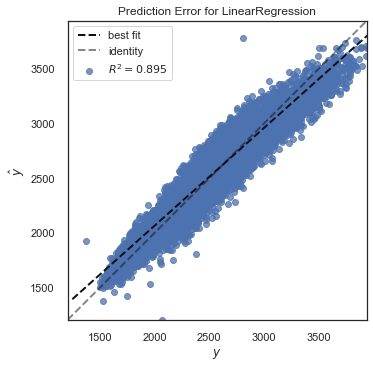

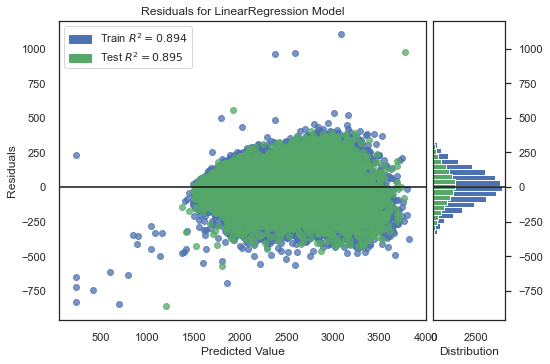

In [45]:
# solução 5: com 3 notas, as maiores correlações -> NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_COMP3
notas = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP3', 'nota_total']
regressao_completa_para(notas)

> Das analises mais interessantes, além de ver como a correlação influencia nos resultados e erros com somente uma unica variavel independente, temos que a analise de três variáveis independetes com as maiores corrrelações, proporcionou um alto valor de R², assim como baixos valore de MSE e MAE, se comparados com os modelos ajustados até o momento. 

> Isso mostra que só com as três maiores correlações, proporcionou um ajuste de 0.89 nos dados de teste e treino. Isso é relevante, pois possívelmente elas são as mais influenciadoras na nota final, pois possivelemente as maiores notas dos participantes foram nestas três notas, pois elas ajustaram muito bem ao modelo de treino. 

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 4) (33200,) (11067, 4) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 399.4105289279899
********************************************************************************
r2 score 0.8513092704299161
mse 23718.305941155013
mae 108.27237697586489


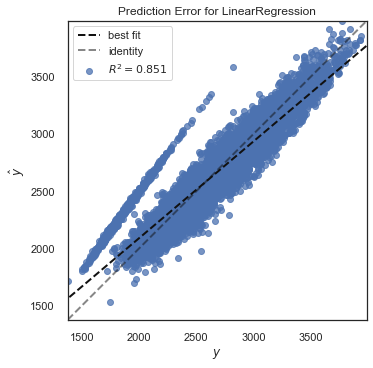

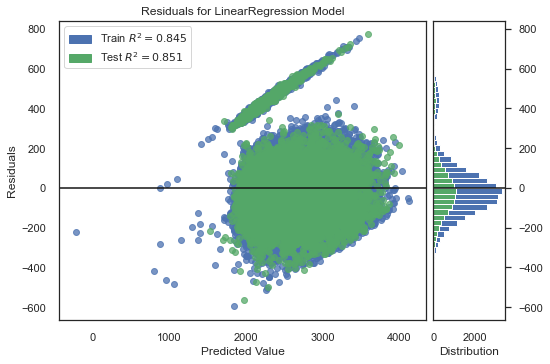

In [46]:
# solução 6: Com as quatro primeiras notas -> "NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT"
notas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", 'nota_total']
regressao_completa_para(notas)

> Agora foi ajustado a partir da exclusão das notas de redação. Podemos observar que apresentou um resultado convincente, com relação ao R², MSE e MAE. Se compararmos com o modelo anterior, ele foi pior mesmo com a inclusão de mais uma variável, mostrando que não necessariamente a inclusão de variavel vai ajustar melhor o modelo. Claro que a diferença foi pequena, mas mesmo assim ocorreu. Isso também deixa evidente a influencia da correlação da nota total com Ciencias Naturais foi bem menor que as outras três notas, possivelemnte devido a essa menor correlação, acarretou em resultados um pouco piores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 5) (33200,) (11067, 5) (11067,)
Usando colunas ['NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'
 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 399.4105289279899
********************************************************************************
r2 score 0.6735584909436052
mse 52072.10702428142
mae 183.54309472841342


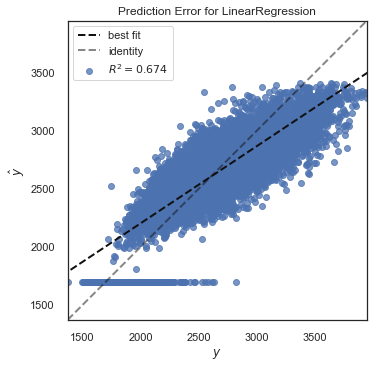

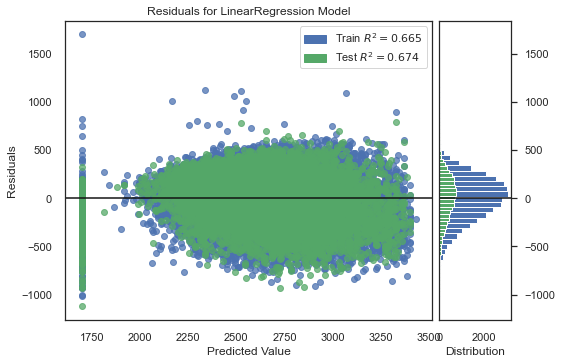

In [47]:
# solução 6: Notas da redação ->"NU_NOTA_COMP1", "NU_NOTA_COMP1","NU_NOTA_COMP1","NU_NOTA_COMP1", "NU_NOTA_COMP1"
notas = ["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", 'nota_total']
interesse = enem_eda[notas]
regressao_completa_para(notas)

> Por ultimo temos a relação com todas as notas de redação. E assim como falado anteriormente, como elas apresentavam as piores correlações, o resultado foi bem pior que os anteriores, menos as com uma variavel independente. Mostrando que a quantidade não necessariamente significa uma melhor ajuste e como a correlação influencia no resultado final. 

> Alias se compararmos esse modelo com o de uma variavel NU_NOTA_CH, que tem a maior correlação, o ajuste foi bem próximo. O modelo das redações foi de 0.65, enquanto o do CH foi de 0.63. Muito próximo, mesmo com três variaveis a mais. A correlação influencia muito.

## Solução

- A correlação tem uma influencia muito grande no modelo final e seus resultados. As variaveis com maiores correlações, proporcionavam melhores resultados em R², MSE e MAE.

- A quantidade de variaveis independentes não necessariamente siginifica melhores ajustes e resultados, assim como uso de todas as variaveis levam a resultados que não são reais e relevantes, neste caso, pois a variavel dependente foi originada das outras variaveis independentes.

- A distruibuição de quase todos os modelos ajustados, seja treino ou teste, resultaram em uma distribuição normal, o que é excelente para analise, pois conseguimos tratá-las com maior certeza de resultados, pois sabemos como é sua distribuição.

- O número de variaveis usadas vai depender do que você deseja fazer, mas posso afirmar que entre três e quatro variaveis independentes resulta num modelo bom em questão de ajuste e erros. Retirei essa conclusão a partir das simulações anteriores e a do modelo específico a seguir. Usar métodos presente no sklearn para tratamento de multiplas variáveis talvez seja interessante para saber quantas variaveis usar e quais usar.

- Algo interessante a se fazer também é verificar a correlação entre as notas e saber quais delas são altamente correlacionas entre si. Isso pode ser problematico, pois caso isso seja verdade, pode ser que na regressão uma influencie a outra mais do que a variável dependente.

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 399.4105289279899
********************************************************************************
r2 score 0.927002939125342
mse 11644.079140886794
mae 85.74413926963126


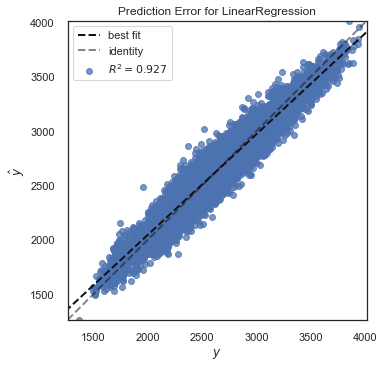

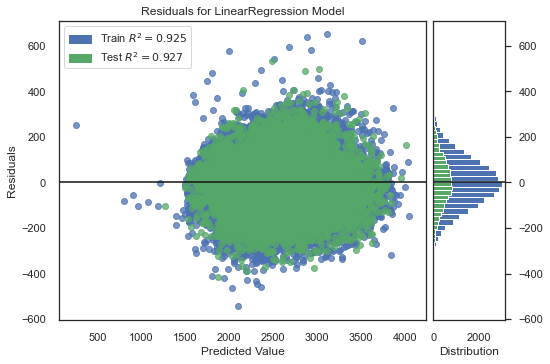

In [48]:
# solução
notas = ["NU_NOTA_LC", "NU_NOTA_COMP3", "NU_NOTA_MT", 'nota_total']
regressao_completa_para(notas)

## Solução

- Ao realizar um comparativo com as simulações anteriores, o modelo ajustado apresentou um bom resultado de R², assim como baixo MSE e MAE. Mesmo comparando com o modelo com as três maiores correlações (CH, LC e COMP3), o modelo atual apresentou resultados e ajustes melhores. Assim como a distribuição normal, a olho nu, resultou em um formato bem próximo a distribuição normal base, com a mediana, moda e média sendo iguais. Possivelemente, estes três parâmetros são bem próximos neste modelo.

- Posso afirmar que este modelo é excelente para realizar outros tipos de regressões e analise de predição, acurácia e erros. Isso porque ele apresenta uma boa distribuição de dados, bem próxima da normal. E por ter notas de redação e de provas como variáveis.

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

Não sei se podia, mas eu mudei um pouco os argumentos da função gera_regressores. Achei deste jeito melhor, que poderia colocar quantos quiser.

In [49]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores(*args):
    modelos = list()
    for i in args:
        modelos.append(i)
    return modelos

In [50]:
# teste
modelos = gera_regressores(LinearRegression(), 
                           Lasso(), 
                           Ridge(), 
                           DecisionTreeRegressor(), 
                           RandomForestRegressor())
if(len(modelos) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [51]:
# solução
def escolhe_dados(dados, colunas):
    # extraia as colunas
    X = dados[colunas[:len(colunas)-1]]
    Y = dados[colunas[-1]]
    # faça o split
    train_x, test_x, train_y, test_y = train_test_split(X, Y)
    # plote o histograma de train_y
    plt.hist(train_y, bins=75)
    plt.xlabel('train_y', fontsize=15)
    plt.ylabel('frequência', fontsize=15)
    plt.show()
    return train_x, test_x, train_y, test_y

A função do split em treino e teste não especifica qualquer seed ou tamanho de teste e treino, portanto foi deixado sem seed nenhum, então os resultados abaixo que usarem essa função sempre apresentarão resultados diferentes a cada submissão. E no caso do tamanho de teste e treino esta no padrão de 25 e 75%, respectivamente.

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [52]:
# solução:
import time

def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine seu modelo
    modelo.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    test_pred = modelo.predict(test_x)
    # calcule o mse
    mse = mean_squared_error(test_y, test_pred)
    # calcule o mae
    mae = mean_absolute_error(test_y, test_pred)
    print("Resultado", modelo, mse, mae) # acho que não precisaria desta linha

    return mse, mae, tempo_de_treino

In [53]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    modelos = gera_regressores(LinearRegression(), 
                               Lasso(), 
                               Ridge(), 
                               DecisionTreeRegressor(), 
                               RandomForestRegressor())
    
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = list()
    for modelo in modelos:
        scaler = StandardScaler()
        pipe = make_pipeline(scaler, modelo)
        # use o make_pipeline ou crie um Pipeline
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

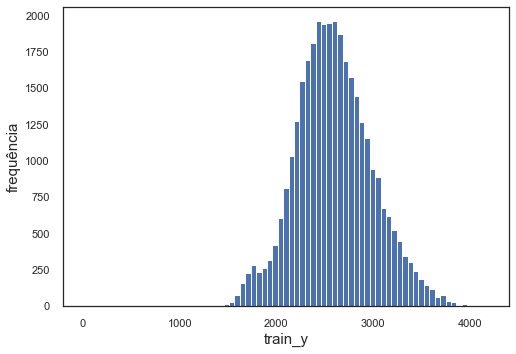

Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]) 11644.079140886792 85.74413926963126
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())]) 11645.653768707793 85.7954866196025
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]) 11644.077758656926 85.74434752723603
Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())]) 22309.92929610554 117.94891117737419
Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())]) 12831.721489314277 89.7300705688727


,modelo,mse,mae,tempo_de_treino
0,LinearRegression(),11644.079,85.744,0.010
1,Lasso(),11645.654,85.795,0.008
2,Ridge(),11644.078,85.744,0.006
3,DecisionTreeRegressor(),22309.929,117.949,0.143
4,"(DecisionTreeRegressor(max_features='auto', ra...",12831.721,89.730,8.743


In [54]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

Talvez fosse necessário uma busca melhor por hiperparâmetros nos modelos apresentados, pois foram implementados com as propriedades padrões do modelo.

---

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

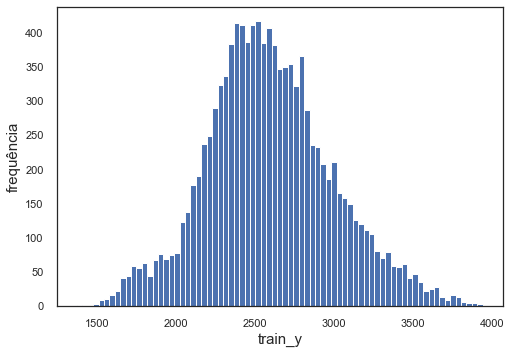

In [55]:
# solução: histograma
plt.hist(test_y, bins=75)
plt.xlabel('train_y', fontsize=15)
plt.ylabel('frequência', fontsize=15)
plt.show()

In [56]:
test_y.describe()

count   11067.000
mean     2592.232
std       399.411
min      1373.700
25%      2330.200
50%      2567.400
75%      2832.650
max      3940.700
Name: nota_total, dtype: float64

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [57]:
# solução
def top_p(serie, p = 0.75):
    quant = serie.quantile(p)
    print("quantile encontrado", quant)
    y = pd.Series([0 if i < quant else 1 for i in serie])
    return y

In [58]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [59]:
# teste do top 10%
top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [60]:
# código pronto
y_top25 = top_p(test_y)
y_top25.mean()

quantile encontrado 2832.65


0.2500225896810337

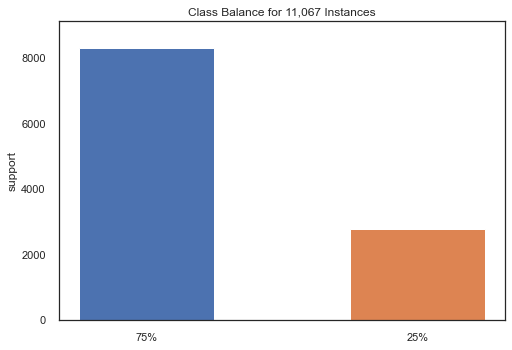

<AxesSubplot:title={'center':'Class Balance for 11,067 Instances'}, ylabel='support'>

In [61]:
# código pronto
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

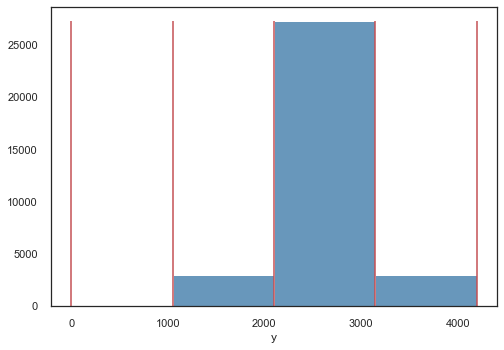

<AxesSubplot:xlabel='y'>

In [62]:
# código pronto
from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [63]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [64]:
# solução
def gera_classificadores(*args):
    classificadores=list()
    for i in args:
        classificadores.append(i)
    return classificadores

In [65]:
# código pronto
classificadores = gera_classificadores(DummyClassifier(), LogisticRegression(), RidgeClassifier(),
                                       DecisionTreeClassifier(), RandomForestClassifier(), SVC())
if(len(classificadores) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [66]:
def split_classificacao(dados):
    # faça o seed do numpy
    seed = 42367
    np.random.seed(seed)
    # defina X como todas as colunas de `dados` exceto top_p
    X = dados[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
    # defina y como somente a coluna top_p
    y = dados.top_p
    # quebre em treino e teste, usando estratificação baseada em y
    train_x, test_x, train_y, test_y = train_test_split(X, 
                                                        y, 
                                                        random_state=seed, 
                                                        stratify=y)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    print(f"Usando colunas {str(train_x.columns.values)} como X")
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [67]:
# código pronto: teste
interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse.reset_index(drop=True, inplace=True)
interesse.insert(loc=interesse.shape[1]-1, column = 'top_p', value=top_p(interesse.nota_total))
interesse = interesse[['top_p', "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

quantile encontrado 2841.55
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


## Pergunta: implemente o treino e o teste do classificador

In [68]:
# solução:

import time
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    pipe.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic
    # calcule a accuracy_score
    accuracy_score = pipe.score(test_x, test_y)
    print("Resultado", nome, accuracy_score)

    return accuracy_score, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [69]:
# solução:
# usei o insert para criar a coluna top_p para parar de car um warning sobre cópia de dataframe.
def escolhe_dados_para_classificacao(dados, colunas, p):
    interesse = dados[colunas]
    interesse.reset_index(drop=True, inplace=True)
    nota_total = dados.nota_total
    interesse.insert(loc=interesse.shape[1]-1, 
                     column = 'top_p', 
                     value=top_p(nota_total, p=p))

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 2841.55
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


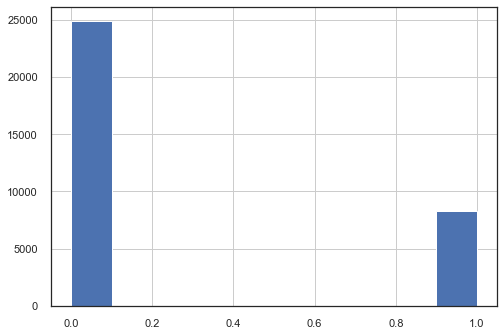

In [70]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, 
                                                                    ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], 
                                                                    p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [71]:
# código pronto
def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    modelos = gera_classificadores(DummyClassifier(strategy='stratified'), LogisticRegression(), RidgeClassifier(),
                                   DecisionTreeClassifier(), RandomForestClassifier(), SVC())
    
    resultados = list()
    for modelo in modelos:
        nome = type(modelo).__name__
        scaler = StandardScaler()
        pipe = make_pipeline(scaler, modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")

## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 2841.55
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


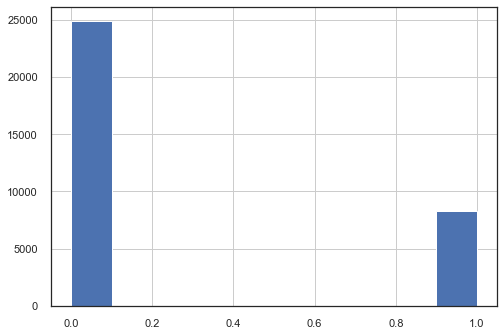

Resultado DummyClassifier 0.6298906659437968
Resultado LogisticRegression 0.9364778169332248
Resultado RidgeClassifier 0.9209361163820367
Resultado DecisionTreeClassifier 0.9099123520375892
Resultado RandomForestClassifier 0.9268997921749345
Resultado SVC 0.9372006867263034


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.630,0.007
LogisticRegression,0.936,0.040
RidgeClassifier,0.921,0.014
DecisionTreeClassifier,0.910,0.075
RandomForestClassifier,0.927,2.727
SVC,0.937,6.629


In [72]:
# solução top 25%
test_x, test_y, notas = analisa_classificacao(enem_eda)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2915.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2000542152344809


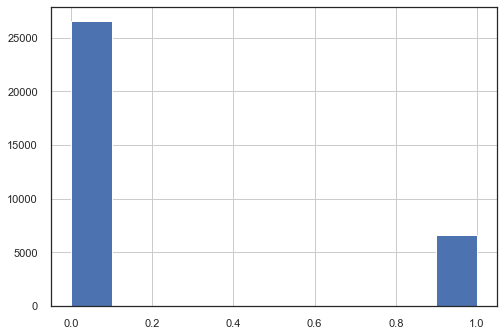

Resultado DummyClassifier 0.6893467064245052
Resultado LogisticRegression 0.9460558416915154
Resultado RidgeClassifier 0.9287973253817656
Resultado DecisionTreeClassifier 0.9203939640372278
Resultado RandomForestClassifier 0.9399114484503479
Resultado SVC 0.946236559139785


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.689,0.007
LogisticRegression,0.946,0.040
RidgeClassifier,0.929,0.015
DecisionTreeClassifier,0.920,0.080
RandomForestClassifier,0.940,2.407
SVC,0.946,4.785


In [73]:
# solução top 20%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.8)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3119.0
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.10002710761724044


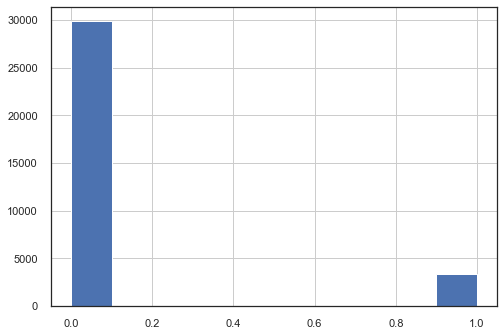

Resultado DummyClassifier 0.8245233577301888
Resultado LogisticRegression 0.971627360621668
Resultado RidgeClassifier 0.9281648143128219
Resultado DecisionTreeClassifier 0.9582542694497154
Resultado RandomForestClassifier 0.9658444022770398
Resultado SVC 0.971175567000994


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.825,0.006
LogisticRegression,0.972,0.046
RidgeClassifier,0.928,0.015
DecisionTreeClassifier,0.958,0.063
RandomForestClassifier,0.966,2.073
SVC,0.971,2.680


In [74]:
# solução top 10%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.9)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3290.809999999999
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.05005873317068763


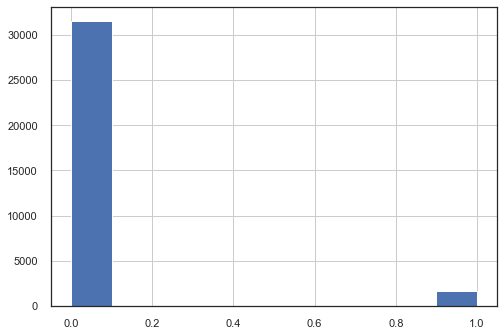

Resultado DummyClassifier 0.9094605584169152
Resultado LogisticRegression 0.9796692870696666
Resultado RidgeClassifier 0.9499412668293123
Resultado DecisionTreeClassifier 0.9727116653112858
Resultado RandomForestClassifier 0.9778621125869703
Resultado SVC 0.979488569621397


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.909,0.008
LogisticRegression,0.980,0.046
RidgeClassifier,0.950,0.015
DecisionTreeClassifier,0.973,0.062
RandomForestClassifier,0.978,1.820
SVC,0.979,1.709


In [75]:
# solução top 5%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.95)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3588.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.01002981837896449


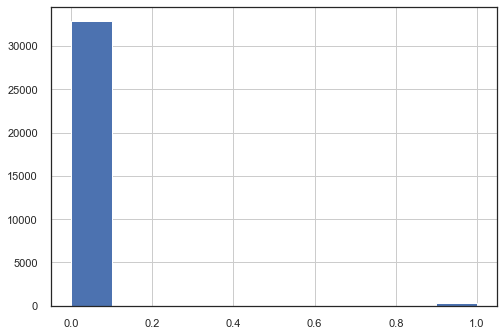

Resultado DummyClassifier 0.9815668202764977
Resultado LogisticRegression 0.9943074003795066
Resultado RidgeClassifier 0.9899701816210356
Resultado DecisionTreeClassifier 0.9924098671726755
Resultado RandomForestClassifier 0.9935845305864281
Resultado SVC 0.9942170416553718


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.982,0.006
LogisticRegression,0.994,0.057
RidgeClassifier,0.990,0.014
DecisionTreeClassifier,0.992,0.056
RandomForestClassifier,0.994,1.516
SVC,0.994,0.454


In [76]:
# solução top 1%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.99)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2330.45
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7499774103189663


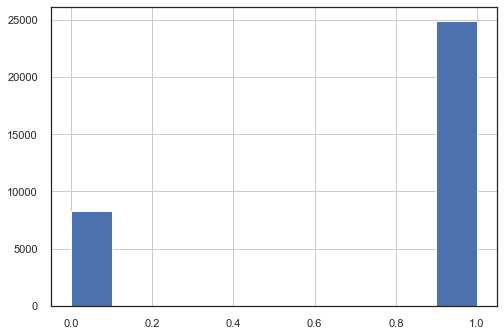

Resultado DummyClassifier 0.6326014276678413
Resultado LogisticRegression 0.9204843227613626
Resultado RidgeClassifier 0.9030450890033432
Resultado DecisionTreeClassifier 0.8856962139694587
Resultado RandomForestClassifier 0.9109062980030722
Resultado SVC 0.9226529321405982


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.633,0.007
LogisticRegression,0.920,0.038
RidgeClassifier,0.903,0.014
DecisionTreeClassifier,0.886,0.084
RandomForestClassifier,0.911,2.739
SVC,0.923,7.650


In [77]:
# solução bottom 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.25)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

## Solução

- Comparando as duas simulações de top 25% e bottom 25%, os resultados de acurácia forma parecidos, quando analisamos os mesmos modelos utilizados. Sendo o DummyClassifier o pior dentre todos os classificadores, mas comparando modelos iguais, as simulações forma parecidas e bem próximas em acurácia.

- No geral temos que a regressão logistica foi melhor para quase todas as simulações de top feitas pelo projeto, mas como disse anteriormente, quase todas foram parecidas em acurácia. Talvez um uso de hiperparâmetros com os modelos possiveis par tal seria interessante, para otimização dos modelos.

- Com outros parâmetros de quartil, as acurácias de todos eles aumentarão acima de 90%, com o maior incremento no DummyClassifier.

- Tirando o DummyClassifier, a simulção de top 25% resultaou em valore maiores de acurácia, mas com pouca diferença. No caso do dummy, o bottom 25% apresentou uma acurácia maior, mas somente de 0.03 de diferença.

---

quantile encontrado 2841.55
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


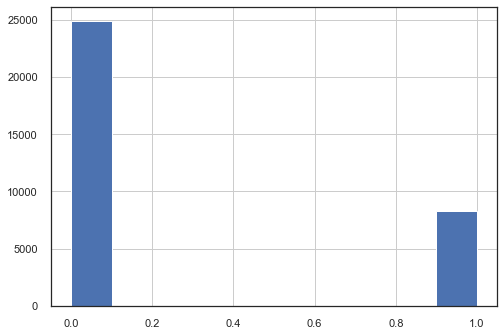

Resultado DummyClassifier 0.6298906659437968
Resultado LogisticRegression 0.9364778169332248
Resultado RidgeClassifier 0.9209361163820367
Resultado DecisionTreeClassifier 0.9099123520375892
Resultado RandomForestClassifier 0.9268997921749345
Resultado SVC 0.9372006867263034


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.630,0.007
LogisticRegression,0.936,0.037
RidgeClassifier,0.921,0.014
DecisionTreeClassifier,0.910,0.075
RandomForestClassifier,0.927,2.428
SVC,0.937,5.734


In [78]:
# código pronto: rodando para top 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.75)
# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
notas[["accuracy_score", "tempo_de_treino"]]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [79]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9364778169332248


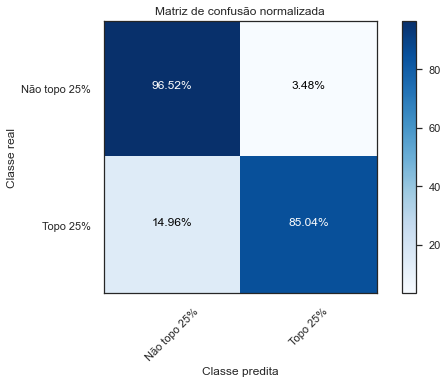

In [80]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9372006867263034


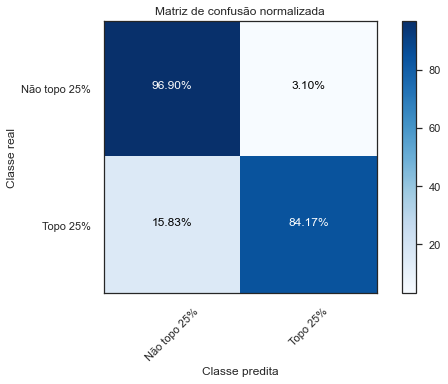

In [81]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [82]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4382488 elementos


In [83]:
enem_validacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000,2681.400
1,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000,2949.500
2,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000,2786.700
3,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000,2795.000
4,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000,2858.500
...,...,...,...,...,...,...,...,...,...,...
4426750,504.100,417.900,429.600,388.400,120.000,120.000,100.000,80.000,40.000,2200.000
4426751,520.200,571.100,558.400,578.100,160.000,120.000,140.000,140.000,120.000,2907.800
4426752,461.300,424.200,431.500,407.600,120.000,120.000,120.000,100.000,80.000,2264.600
4426753,540.800,586.900,528.400,479.200,0.000,0.000,0.000,0.000,0.000,2135.300


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [84]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
    y = top_p(dados.nota_total)
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [85]:
# solução
from sklearn.model_selection import cross_val_score, StratifiedKFold

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X, y = separa_dados_de_classificacao_para_validacao(dados)
    scores = cross_val_score(estimator=modelo, 
                             X=X, 
                             y=y, 
                             cv=StratifiedKFold(n_splits=5),
                             verbose=1, 
                             n_jobs=-1)
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

### Logistic Regression

quantile encontrado 2839.5
Média da validação 0.25000821451193933


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.4s finished


Acurácia entre [93.48,93.49]
Acurácia do modelo em teste 0.9350118015154861


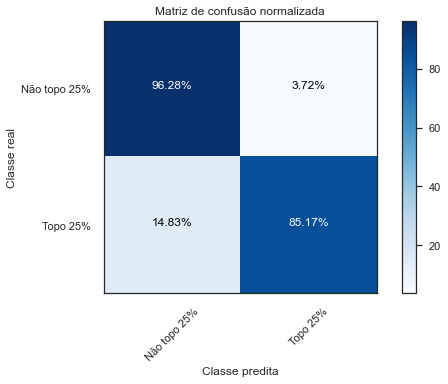

In [86]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

### Dummy Classifier

quantile encontrado 2839.5
Média da validação 0.25000821451193933


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished


Acurácia entre [62.48,62.48]
Acurácia do modelo em teste 0.6247282365633403


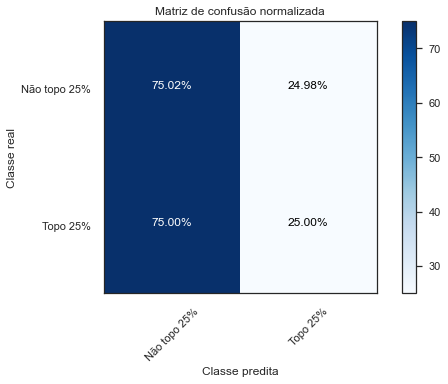

In [87]:
pipeline_dummy = make_pipeline(StandardScaler(), DummyClassifier(strategy='stratified'))
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_dummy)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [88]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
        # some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha    
        parcial = X.sum(axis=1)
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print(f"top 25 quantile é {self.top_25_quantile:.2f}")
        return self

    def predict(self, X, y = None):
        # some por coluna
        parcial = X.sum(axis=1)
        # compare a soma parcial com o self.top25_quantile
        y_pred_true_false = [0 if i < self.top_25_quantile else 1 for i in parcial]
        # 1 se for maior ou igual, 0 caso contrário
        y_pred = pd.Series(y_pred_true_false)
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

### Heuristica

quantile encontrado 2839.5
Média da validação 0.25000821451193933


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


Acurácia entre [91.84,91.85]
top 25 quantile é 1247.90
Acurácia do modelo em teste 0.9184449563809416


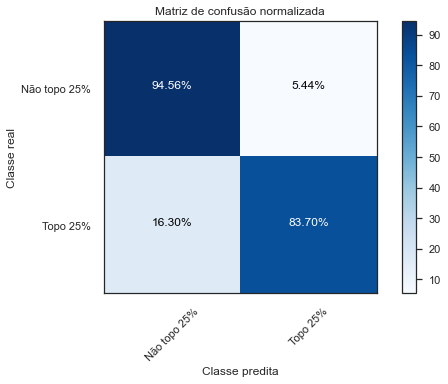

In [89]:
treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())

## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

Comparando os resultados dos três tipos apresentados, temos o seguinte:

- A regressão logistica e heuristica final apresentaram os melhores resultados, com ambos apresentando valores próximos. O primeiro apresentou as melhores taxas de acerto e acurácia entre os dois. Na matriz de confusão a regressão logistica apresentou maiores valores de verdadeiros positivos e negativos. A heuristica apresentou valores um pouco piores na matriz de confusão.

- O dummy classifier apresentou o pior resultado, com uma baixa acurácia. Na matriz de confusão, o modelo acertou na classe predita 25% dos dados acima dos 25% de topo, classificando em 75% como não topo 25%, sendo que eles eram topo 25%. Mas em compensação no caso que não eram topo 25% ele acertou 75% como não topo 25%. Ou seja, ele classificou mais corretamente valores que não eram topo 25%, do que aqueles que realmente eram topo 25%.

- No geral a regressão logistica apresentou melhores resultados que os outros dois modelos, e o pior foi o dummy classifier.

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

Outras heuristicas seriam (supondo que os 25% são constantes):

- Tentar encontrar mais relações entre as notas do ENEM. Usar as correlações das notas, inclusão de mais notas de redação.

- Uso das notas que possuem mais capacidade dos alunos, isso talvez indicasse que para estas notas os alunos estarão acima dos 25%.

- Podemos fazer o oposto, usando notas passadas, podemos investigar se aqueles que possuiam notas piores em certas notas não estarão acima dos 25%.

- Usar uma faixa próxima dos 25%, pois se a nota de corte é 2800, temos que observar os alunos que tiveram entre 2700 e 2800, e analisar se ele não seriam elegíveis para estarem dentro dos 25%.

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

Com um modelo com maior taxa de acerto, temos.

- A faculdade poderia analisar os casos de falsos positivos e negativos. Com a verificação destas duas partes, poderiam ver realmente quem são realmente os que passaram por essa nota de corte. Teriam que ser feito a partir de modelos, pois dependendo da porcentagem de falsos positivos e negativos, seria muito trabalhoso.

- Identicar quais são aqueles que foram julgados de forma errônea, pegar seus dados e refinar o modelo em função do porque eles foram classificados de forma incorreta. Isso porque nenhum modelo real vai conseguir ter uma acurácia de 100%. A realização de uma outra exploração a partir dos dados que deram falsos positivos e negativos.

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!

---